In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data for X and corresponding y values
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X (for the intercept)
X_b = np.c_[np.ones((100, 1)), X]


In [6]:
# Gradient Descent parameters
learning_rate = 0.1
n_iterations = 50
m = len(y)

# Initialize theta (parameters) randomly
theta = np.random.randn(2, 1)

In [8]:
# Function to calculate predictions
def predict(X_b, theta):
    return X_b.dot(theta)

# Function to calculate cost
def compute_cost(X_b, y, theta):
    predictions = predict(X_b, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)


In [10]:
# Lists to store intermediate values for plotting
costs = []
theta_values = []
iterations = []

# Gradient Descent algorithm
for iteration in range(n_iterations):
    gradients = (1 / m) * X_b.T.dot(predict(X_b, theta) - y)
    theta -= learning_rate * gradients
    theta_values.append(theta.copy())
    costs.append(compute_cost(X_b, y, theta))
    iterations.append(iteration)


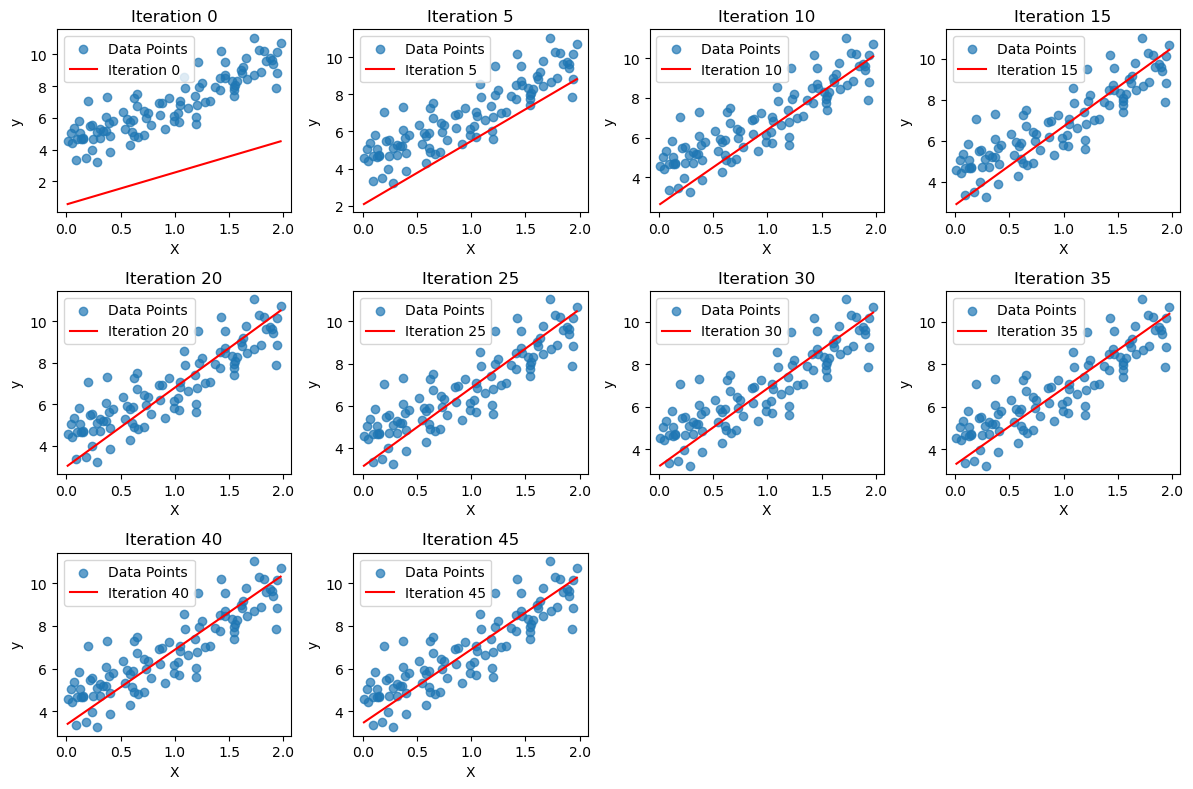

In [12]:
# Plot initial data and regression line at each iteration
plt.figure(figsize=(12, 8))

for i in range(0, n_iterations, 5):  # Plot every 5th iteration
    plt.subplot(3, 4, i // 5 + 1)
    plt.scatter(X, y, alpha=0.7, label="Data Points")
    X_line = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
    X_line_b = np.c_[np.ones((100, 1)), X_line]
    y_line = predict(X_line_b, theta_values[i])
    plt.plot(X_line, y_line, color="red", label=f"Iteration {iterations[i]}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title(f"Iteration {iterations[i]}")

plt.tight_layout()
plt.show()


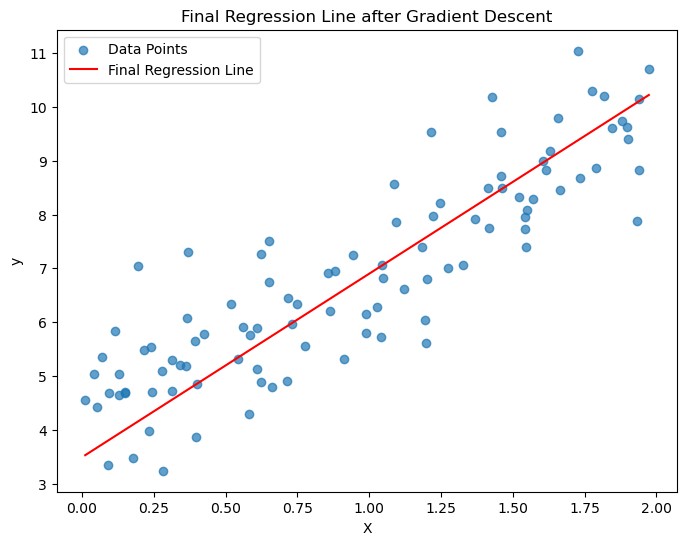

In [14]:
# Final Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data Points")
X_line = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
X_line_b = np.c_[np.ones((100, 1)), X_line]
y_line = predict(X_line_b, theta)
plt.plot(X_line, y_line, color="red", label="Final Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Final Regression Line after Gradient Descent")
plt.show()


In [23]:
# Plot Cost History
# Re-initialize theta for fresh computation
theta = np.random.randn(2, 1)

# Gradient Descent algorithm with cost history storage
cost_history = []

for iteration in range(n_iterations):
    gradients = (1 / m) * X_b.T.dot(predict(X_b, theta) - y)
    theta -= learning_rate * gradients
    cost_history.append(compute_cost(X_b, y, theta))

# Display the first 10 costs for brevity
cost_history[:10]

[17.28511343357379,
 11.03504676500836,
 7.099690009210757,
 4.621764898405018,
 3.0614964825379656,
 2.079021926880904,
 1.4603506378470477,
 1.0707459542989115,
 0.8253724949166557,
 0.6708146164573884]

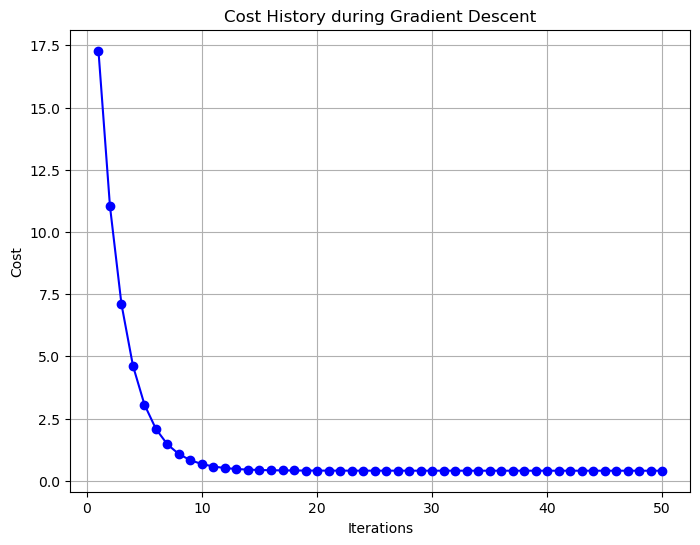

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_iterations + 1), cost_history, marker='o', linestyle='-', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History during Gradient Descent")
plt.grid()
plt.show()